## 🔧 Section 1: Environment Setup & Configuration

**Objective**: Set up reproducible analysis environment with all necessary libraries and configurations.

**Why it matters**: 
- Ensures reproducibility across different environments
- Configures visualization settings for publication-quality outputs
- Suppresses warnings for cleaner notebook output

In [1]:
# Core Data Manipulation
import pandas as pd
import numpy as np
from pathlib import Path
import warnings

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical Analysis
from scipy import stats
from scipy.stats import normaltest, shapiro, kstest, skew, kurtosis
from scipy.stats.contingency import chi2_contingency

# Machine Learning (for EDA insights)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# Imbalance Detection
from collections import Counter

# System & Utilities
import os
import sys
from datetime import datetime
import json

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

# Visualization Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Random Seed for Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Environment setup complete!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🐍 Python Version: {sys.version.split()[0]}")
print(f"🐼 Pandas Version: {pd.__version__}")
print(f"🔢 NumPy Version: {np.__version__}")

✅ Environment setup complete!
📅 Analysis Date: 2025-12-13 11:17:24
🐍 Python Version: 3.11.9
🐼 Pandas Version: 2.3.3
🔢 NumPy Version: 2.2.6


## 📂 Section 2: Data Loading & Initial Assessment

**Objective**: Load data and perform high-level sanity checks before detailed analysis.

**Why it matters**:
- Validates data accessibility and format
- Provides first impression of dataset size and structure
- Identifies potential loading issues early
- Establishes baseline understanding of features and samples

In [2]:
# Define data path (adjust as needed)
DATA_PATH = Path('../data/processed/breast_cancer_features_better.csv')

# Load dataset
try:
    df = pd.read_csv(DATA_PATH)
    print(f"✅ Dataset loaded successfully from: {DATA_PATH}")
    print(f"\n📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")
    print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
except FileNotFoundError:
    print(f"❌ Error: File not found at {DATA_PATH}")
    print("Please adjust DATA_PATH variable to point to your dataset.")
except Exception as e:
    print(f"❌ Error loading data: {e}")

✅ Dataset loaded successfully from: ..\data\processed\breast_cancer_features_better.csv

📊 Dataset Shape: 8,651 rows × 769 columns
💾 Memory Usage: 50.76 MB


### 2.1 First Look at the Data

**Purpose**: Visual inspection of actual data values to spot immediate issues.

In [3]:
# Display first rows
print("🔝 First 5 Rows:")
display(df.head())

print("\n🔻 Last 5 Rows:")
display(df.tail())

print("\n🎲 Random 5 Rows (for unbiased view):")
display(df.sample(5, random_state=RANDOM_STATE))

🔝 First 5 Rows:


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f534,f535,f536,f537,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f626,f627,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f656,f657,f658,f659,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f670,f671,f672,f673,f674,f675,f676,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686,f687,f688,f689,f690,f691,f692,f693,f694,f695,f696,f697,f698,f699,f700,f701,f702,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f715,f716,f717,f718,f719,f720,f721,f722,f723,f724,f725,f726,f727,f728,f729,f730,f731,f732,f733,f734,f735,f736,f737,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,label
0,-0.0834,0.1046,-0.1655,-0.1115,-0.1366,-0.0751,0.0627,-0.1726,0.0459,0.1921,-0.0617,0.0788,0.0576,-0.1783,-0.0499,0.1796,0.1635,0.1719,-0.0544,-0.1683,-0.1114,0.1258,0.1813,-0.0550,-0.2721,0.0660,0.1124,-0.1365,-0.2094,0.2678,0.2005,-0.0082,-0.0678,0.1377,-0.02


🔻 Last 5 Rows:


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f534,f535,f536,f537,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f626,f627,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f656,f657,f658,f659,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f670,f671,f672,f673,f674,f675,f676,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686,f687,f688,f689,f690,f691,f692,f693,f694,f695,f696,f697,f698,f699,f700,f701,f702,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f715,f716,f717,f718,f719,f720,f721,f722,f723,f724,f725,f726,f727,f728,f729,f730,f731,f732,f733,f734,f735,f736,f737,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,label
8646,0.0207,-0.0878,-0.1066,0.0332,-0.2472,0.0462,0.1265,-0.1912,0.1231,0.0187,-0.3561,0.1221,0.1247,0.0323,0.0302,0.0759,0.0867,-0.1886,0.0922,0.1113,0.0712,-0.0271,-0.0476,0.1185,-0.2831,-0.1034,0.3064,0.0297,-0.1425,-0.2303,-0.2272,-0.1258,-0.0197,-0.0076,0.19


🎲 Random 5 Rows (for unbiased view):


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f534,f535,f536,f537,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f626,f627,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f656,f657,f658,f659,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f670,f671,f672,f673,f674,f675,f676,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686,f687,f688,f689,f690,f691,f692,f693,f694,f695,f696,f697,f698,f699,f700,f701,f702,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f715,f716,f717,f718,f719,f720,f721,f722,f723,f724,f725,f726,f727,f728,f729,f730,f731,f732,f733,f734,f735,f736,f737,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,label
5579,0.0884,-0.1327,0.0585,-0.1586,-0.2349,-0.1502,-0.0254,-0.4136,-0.0238,0.2838,-0.2935,0.2508,0.0771,-0.1041,-0.1645,0.1793,0.0026,0.0005,-0.2213,-0.0144,-0.1392,-0.0820,-0.0222,-0.0062,-0.0408,0.0458,0.2024,0.1699,0.1265,0.1001,0.0073,0.1007,0.1144,0.0136,-0.

### 2.2 Dataset Metadata & Structure

**Purpose**: Understand data types, memory footprint, and feature composition.

**Key Checks**:
- Are numeric features correctly typed? (int64/float64)
- Are categorical features stored as object/category?
- Any datetime features that need parsing?
- Memory optimization opportunities?

In [4]:
# Detailed dataset information
print("📋 Dataset Information:")
print("="*80)
df.info(verbose=True, show_counts=True)

print("\n" + "="*80)
print("📊 Column Data Types Summary:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  • {dtype}: {count} columns")

# Identify feature types
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_features = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"\n🔢 Numerical Features: {len(numerical_features)}")
print(f"🏷️  Categorical Features: {len(categorical_features)}")
print(f"📅 Datetime Features: {len(datetime_features)}")

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8651 entries, 0 to 8650
Data columns (total 769 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    f0      8651 non-null   float64
 1    f1      8651 non-null   float64
 2    f2      8651 non-null   float64
 3    f3      8651 non-null   float64
 4    f4      8651 non-null   float64
 5    f5      8651 non-null   float64
 6    f6      8651 non-null   float64
 7    f7      8651 non-null   float64
 8    f8      8651 non-null   float64
 9    f9      8651 non-null   float64
 10   f10     8651 non-null   float64
 11   f11     8651 non-null   float64
 12   f12     8651 non-null   float64
 13   f13     8651 non-null   float64
 14   f14     8651 non-null   float64
 15   f15     8651 non-null   float64
 16   f16     8651 non-null   float64
 17   f17     8651 non-null   float64
 18   f18     8651 non-null   float64
 19   f19     8651 non-null   float64
 20   f20     8651 non-null   flo

### 2.3 Statistical Summary

**Purpose**: Get high-level statistics to identify anomalies, scale differences, and distribution characteristics.

**What to look for**:
- Features with vastly different scales (need normalization)
- Min/Max values that seem unrealistic (data errors)
- Mean vs Median differences (skewness indicators)
- Standard deviation relative to mean (variance assessment)

In [ ]:
# Statistical summary with additional metrics : Describe Function chabiba : 
print("📈 Numerical Features - Statistical Summary:")
print("="*80)

summary = df[numerical_features].describe().T
summary['missing%'] = (df[numerical_features].isnull().sum() / len(df)) * 100
summary['zeros%'] = ((df[numerical_features] == 0).sum() / len(df)) * 100

# Reorder columns for better readability
summary = summary[['count', 'missing%', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',  'zeros%']]

display(summary.style.background_gradient(cmap='RdYlGn_r', subset=['missing%'])      
                    .format('{:.2f}'))

📈 Numerical Features - Statistical Summary:


,count,missing%,mean,std,min,25%,50%,75%,max,zeros%
f0,8651.00,0.00,-0.01,0.11,-0.45,-0.08,-0.01,0.07,0.39,0.00
f1,8651.00,0.00,0.03,0.13,-0.45,-0.06,0.03,0.12,0.40,0.00
f2,8651.00,0.00,-0.02,0.08,-0.28,-0.07,-0.02,0.04,0.26,0.00
f3,8651.00,0.00,-0.06,0.12,-0.46,-0.14,-0.05,0.03,0.37,0.00
f4,8651.00,0.00,-0.05,0.10,-0.47,-0.11,-0.04,0.02,0.26,0.00
f5,8651.00,0.00,-0.09,0.16,-0.62,-0.20,-0.11,0.01,0.53,0.00
f6,8651.00,0.00,-0.06,0.14,-0.42,-0.16,-0.08,0.01,0.51,0.00
f7,8651.00,0.00,-0.09,0.14,-0.54,-0.19,-0.09,0.02,0.32,0.00
f8,8651.00,0.00,0.07,0.11,-0.33,-0.01,0.07,0.15,0.45,0.00
f9,8651.00,0.00,0.15,0.15,-0.46,0.05,0.15,0.26,0.59,0.00


 Class Distribution Analysis:

 Class Distribution:
Class                Count   Percentage
----------------------------------------
0.0                  353.0        4.08%
1.0                  944.0       10.91%
2.0                1,157.0       13.37%
3.0                2,087.0       24.12%
4.0                1,201.0       13.88%
5.0                1,703.0       19.69%
6.0                1,206.0       13.94%

 Class Balance Metrics:
   • Total Samples: 8,651
   • Number of Classes: 7
   • Imbalance Ratio: 5.91:1


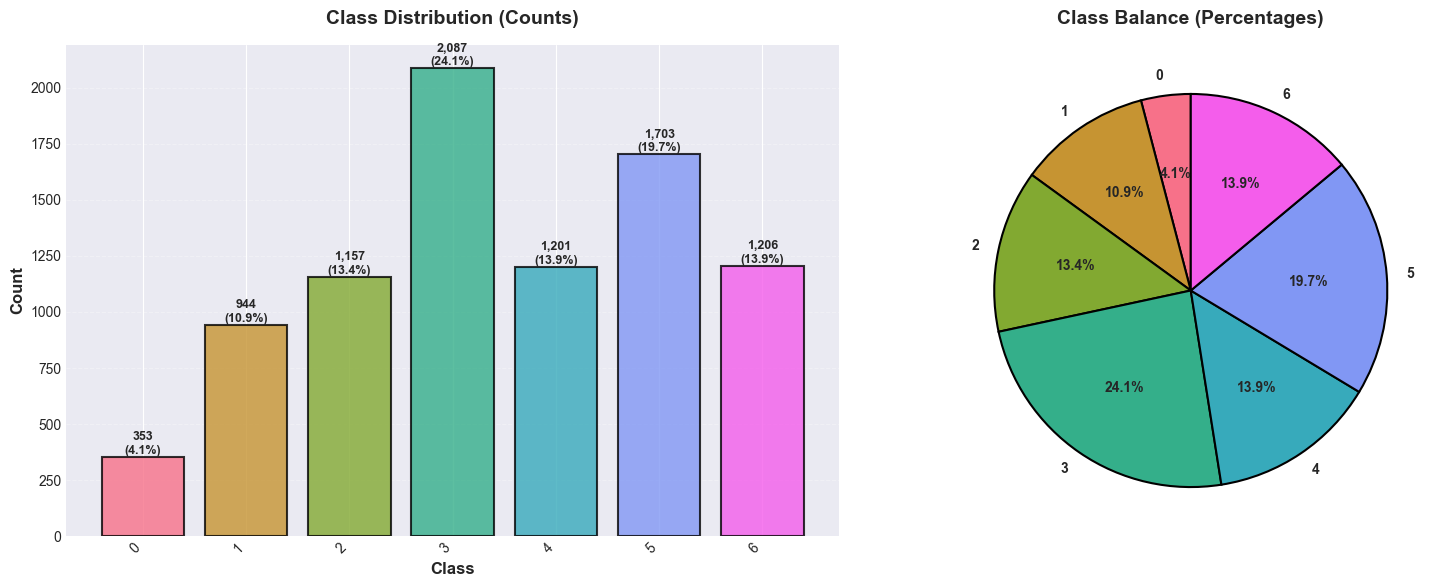

In [ ]:
# Identify target column
TARGET_COLUMN = 'label' if 'label' in df.columns else 'target' if 'target' in df.columns else None

if TARGET_COLUMN and TARGET_COLUMN in df.columns:
    print(" Class Distribution Analysis:")
    print("="*80)
    
    # Get class counts and percentages
    class_counts = df[TARGET_COLUMN].value_counts().sort_index()
    class_percentages = (class_counts / len(df) * 100).round(2)
    
    # Create summary DataFrame
    class_summary = pd.DataFrame({
        'Class': class_counts.index,
        'Count': class_counts.values,
        'Percentage': class_percentages.values
    })
    
    print(f"\n Class Distribution:")
    print(f"{'Class':<15} {'Count':>10} {'Percentage':>12}")
    print("-" * 40)
    for _, row in class_summary.iterrows():
        print(f"{str(row['Class']):<15} {row['Count']:>10,} {row['Percentage']:>11.2f}%")
    
    print(f"\n Class Balance Metrics:")
    print(f"   • Total Samples: {len(df):,}")
    print(f"   • Number of Classes: {len(class_counts)}")
    print(f"   • Imbalance Ratio: {class_counts.max() / class_counts.min():.2f}:1")
    print("How to calculate imbalance ratio : num of majority samples / num fo minority samples " )
    print("Majority class = number of samples in the most frequent class")
    print("Minority class = number of samples in the least frequent class")

    
    # Visualizations
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot - Counts
    colors = sns.color_palette("husl", len(class_counts))
    axes[0].bar(range(len(class_counts)), class_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    axes[0].set_xlabel('Class', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[0].set_title('Class Distribution (Counts)', fontsize=14, fontweight='bold', pad=15)
    axes[0].set_xticks(range(len(class_counts)))
    axes[0].set_xticklabels([str(x).replace('_', '\n') for x in class_counts.index], rotation=45, ha='right')
    axes[0].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add count labels on bars
    for i, (count, pct) in enumerate(zip(class_counts.values, class_percentages.values)):
        axes[0].text(i, count, f'{count:,}\n({pct:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Pie chart - Percentages
    axes[1].pie(class_counts.values, labels=[str(x) for x in class_counts.index], 
               autopct='%1.1f%%', colors=colors, startangle=90, 
               textprops={'fontsize': 10, 'fontweight': 'bold'},
               wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
    axes[1].set_title('Class Balance (Percentages)', fontsize=14, fontweight='bold', pad=15)
    
    plt.tight_layout()
    plt.show()
    

    
else:
    print("  Target column not found in dataset.")
    print("   Common target column names: 'label', 'target', 'class', 'y'")
    print(f"   Available columns: {df.columns.tolist()[:10]}")


### 2.4 Class Distribution & Balance

**Purpose**: Analyze target variable distribution to identify class imbalance issues.

**Why it matters**:
- Class imbalance affects model training (biases toward majority class)
- Imbalanced datasets require special handling (SMOTE, class weights, stratified sampling)
- Understanding distribution helps choose appropriate evaluation metrics


##  Section 3: Data Quality Audit



### 3.2 Duplicate Records Detection

**Purpose**: Identify exact and near-duplicate rows that could cause data leakage.

**Why it matters**:
- Duplicates in training data inflate model performance
- Can cause test set contamination if not removed before split
- May indicate data collection errors




In [10]:
# Check for exact duplicates
duplicate_count = df.duplicated().sum()
duplicate_pct = (duplicate_count / len(df)) * 100

print(f" Duplicate Analysis:")
print("="*80)
print(f"Total Duplicate Rows: {duplicate_count:,} ({duplicate_pct:.2f}%)")

if duplicate_count > 0:
    print(f"\n  Warning: {duplicate_count:,} duplicate rows detected!")
    
    # Show example duplicates
    duplicate_rows = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())
    print(f"\n🔍 Example Duplicate Records (showing first 10):")
    display(duplicate_rows.head(10))
    
    # Duplicates by key columns (if ID columns exist)
    potential_id_cols = [col for col in df.columns if any(x in col.lower() for x in ['id', 'key', 'index', 'name'])]
    if potential_id_cols:
        print(f"\n🔑 Checking duplicates by potential ID columns: {potential_id_cols}")
        for col in potential_id_cols:
            dup_ids = df[col].duplicated().sum()
            if dup_ids > 0:
                print(f"    {col}: {dup_ids:,} duplicate values")
    
    print(f"\n Recommendation: Remove duplicates before train-test split to prevent data leakage")
    print(f"   Command: df_clean = df.drop_duplicates()")
    
else:
    print("!!! No duplicate rows found in the dataset!")


 Duplicate Analysis:
Total Duplicate Rows: 0 (0.00%)
!!! No duplicate rows found in the dataset!


### 3.3 Data Type Validation & Optimization

**Purpose**: Ensure features have correct data types for analysis and identify memory optimization opportunities.

**Why it matters**:
- Incorrect types cause processing errors (e.g., numeric stored as string)
- Memory optimization speeds up analysis on large datasets
- Proper typing enables correct statistical operations

**Industry Tip**: Converting float64 → float32 and int64 → int32 can reduce memory by 50%

In [ ]:
# Data type analysis and optimization
print(" Data Type Distribution & Memory Analysis:")
print("="*80)

# Current memory usage
current_memory = df.memory_usage(deep=True).sum() / 1024**2

dtype_summary = pd.DataFrame({
    'Data_Type': df.dtypes.value_counts().index.astype(str),
    'Count': df.dtypes.value_counts().values,
    'Memory_MB': [df.select_dtypes(include=[dtype]).memory_usage(deep=True).sum() / 1024**2 
                  for dtype in df.dtypes.value_counts().index]
})
display(dtype_summary)

print(f"\n Current Memory Usage: {current_memory:.2f} MB")

# Type inconsistency checks
print("\nType Inconsistency Detection:")
print("="*80)

issues = []

# Check object columns that could be numeric
for col in categorical_features:
    numeric_conv = pd.to_numeric(df[col], errors='coerce')
    conv_rate = (numeric_conv.notna().sum() / len(df)) * 100
    if conv_rate > 90:
        issues.append(f"  {col}: {conv_rate:.1f}% numeric values stored as object")

# Check binary features
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) == 2:
        issues.append(f" {col}: Binary feature - consider boolean encoding")

if issues:
    for issue in issues[:5]:  # Show first 5
        print(issue)
    if len(issues) > 5:
        print(f"   ... and {len(issues)-5} more issues")
else:
    print(" All data types are appropriate!")

# Memory optimization
print("\n Memory Optimization Analysis:")
print("="*80)

optimizations = []
potential_savings = 0

# Float64 → Float32
float64_cols = df.select_dtypes(include=['float64']).columns
if len(float64_cols) > 0:
    float_savings = df[float64_cols].memory_usage(deep=True).sum() / 1024**2 * 0.5
    potential_savings += float_savings
    optimizations.append(('Float64→Float32', len(float64_cols), float_savings))

# Int64 → Int32
int64_cols = df.select_dtypes(include=['int64']).columns
if len(int64_cols) > 0:
    int_savings = df[int64_cols].memory_usage(deep=True).sum() / 1024**2 * 0.5
    potential_savings += int_savings
    optimizations.append(('Int64→Int32', len(int64_cols), int_savings))

# Object → Category (low cardinality)
for col in categorical_features:
    if df[col].nunique() / len(df) < 0.5:
        obj_savings = df[col].memory_usage(deep=True) / 1024**2 * 0.7
        potential_savings += obj_savings

if optimizations:
    for opt_type, col_count, savings in optimizations:
        print(f"🔹 {opt_type}: {col_count} columns, ~{savings:.2f} MB savings")

print(f"\n Total Potential Savings: ~{potential_savings:.2f} MB ({potential_savings/current_memory*100:.1f}%)")

# Apply optimizations if significant savings
if potential_savings > 5:  # If > 5MB savings
    print(f"\n{'='*80}")
    print(" APPLYING MEMORY OPTIMIZATIONS...")
    print(f"{'='*80}")
    
    df_optimized = df.copy()
    
    # Apply optimizations
    for col in float64_cols:
        df_optimized[col] = df_optimized[col].astype('float32')
    
    for col in int64_cols:
        if df_optimized[col].min() >= 0 and df_optimized[col].max() < 2**31:
            df_optimized[col] = df_optimized[col].astype('int32')
    
    for col in categorical_features:
        if df_optimized[col].nunique() / len(df_optimized) < 0.5:
            df_optimized[col] = df_optimized[col].astype('category')
    
    new_memory = df_optimized.memory_usage(deep=True).sum() / 1024**2
    actual_savings = current_memory - new_memory
    
    print(f"\n Optimization Complete!")
    print(f"   • Original Memory : {current_memory:.2f} MB")
    print(f"   • Optimized Memory: {new_memory:.2f} MB")
    print(f"   • Memory Saved    : {actual_savings:.2f} MB ({actual_savings/current_memory*100:.1f}%)")
    print(f"\n💡 Use 'df_optimized' for memory-efficient analysis")
    
    # Update df to optimized version
    df = df_optimized
else:
    print(f"\n Current memory usage is already efficient (potential savings < 5MB)")

📋 Data Type Distribution & Memory Analysis:


,Data_Type,Count,Memory_MB
0,float64,768,50.6896
1,int64,1,0.0661



💾 Current Memory Usage: 50.76 MB

🔍 Type Inconsistency Detection:
✅ All data types are appropriate!

💾 Memory Optimization Analysis:
🔹 Float64→Float32: 768 columns, ~25.34 MB savings
🔹 Int64→Int32: 1 columns, ~0.03 MB savings

💰 Total Potential Savings: ~25.38 MB (50.0%)

🚀 APPLYING MEMORY OPTIMIZATIONS...

✅ Optimization Complete!
   • Original Memory : 50.76 MB
   • Optimized Memory: 25.38 MB
   • Memory Saved    : 25.38 MB (50.0%)

💡 Use 'df_optimized' for memory-efficient analysis


##  Section 4: Bivariate & Multivariate Analysis

**Objective**: Understand relationships between features and identify which variables drive the target prediction.

**Why it matters**:
- Reveals feature dependencies and redundancies
- Identifies multicollinearity (inflates model variance)
- Prioritizes features for modeling
- Guides feature selection and engineering

**Critical for**: Feature selection, avoiding redundant features, understanding model behavior

### 4.1 Correlation Analysis

**Purpose**: Identify linear relationships between features and detect multicollinearity.

**Why it matters**:
- **Strong correlations (|r| > 0.8)**: Redundant features → one can be dropped
- **Zero correlations**: Features provide independent information



 Correlation Analysis:
Analyzing 769 numerical features...


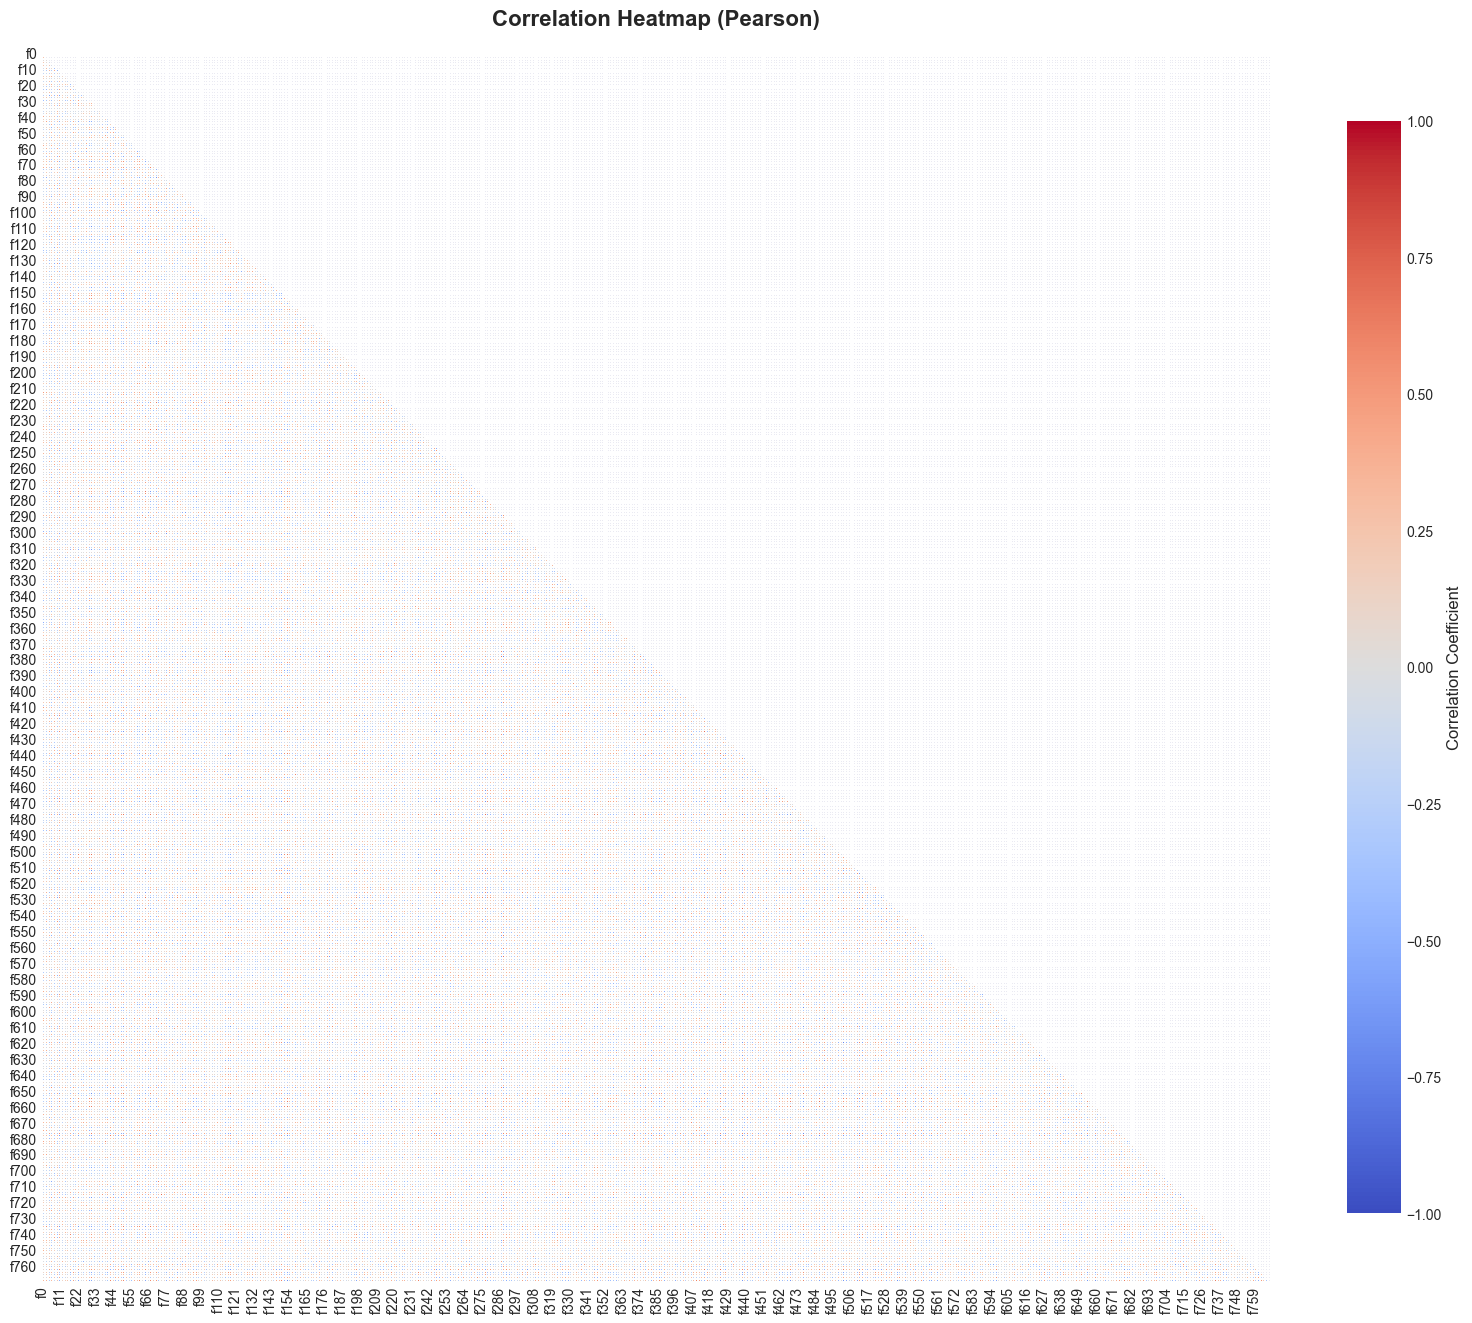


 Strong Correlations (|r| > 0.8):


,Feature_1,Feature_2,Pair_Correlation,F1_Target_Corr,F2_Target_Corr,Keep,Drop
0,f715,f745,-0.973,0.272,0.242,f715,f745


   • f745 (target_corr=0.242)

 Command to drop these features:
   df_cleaned = df.drop(columns=['f745'])


In [20]:
# Compute correlation matrix (Pearson)
if len(numerical_features) > 1:
    corr_matrix = df[numerical_features].corr(method='pearson')
    
    print(" Correlation Analysis:")
    print("="*80)
    print(f"Analyzing {len(numerical_features)} numerical features...")
    
    # Create correlation heatmap
    fig, ax = plt.subplots(figsize=(16, 14))
    
    # Use mask for upper triangle (cleaner visualization)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True if len(numerical_features) <= 20 else False,  # Annotate if <= 20 features
                fmt='.2f',
                cmap='coolwarm',
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
                ax=ax,
                vmin=-1, vmax=1)
    
    ax.set_title('Correlation Heatmap (Pearson)', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Check if target exists for correlation comparison
    TARGET_COLUMN = 'label' if 'label' in df.columns else 'target' if 'target' in df.columns else None
    
    # Identify strong correlations
    print("\n Strong Correlations (|r| > 0.8):")
    print("="*80)
    
    strong_corrs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.8:
                feature_1 = corr_matrix.columns[i]
                feature_2 = corr_matrix.columns[j]
                
                # Calculate correlation with target if available
                if TARGET_COLUMN and TARGET_COLUMN in df.columns:
                    corr_1_target = abs(df[feature_1].corr(df[TARGET_COLUMN]))
                    corr_2_target = abs(df[feature_2].corr(df[TARGET_COLUMN]))
                    
                    # Determine which to keep
                    if corr_1_target > corr_2_target:
                        keep_feature = feature_1
                        drop_feature = feature_2
                        keep_corr = corr_1_target
                        drop_corr = corr_2_target
                    else:
                        keep_feature = feature_2
                        drop_feature = feature_1
                        keep_corr = corr_2_target
                        drop_corr = corr_1_target
                    
                    strong_corrs.append({
                        'Feature_1': feature_1,
                        'Feature_2': feature_2,
                        'Pair_Correlation': corr_val,
                        'F1_Target_Corr': corr_1_target,
                        'F2_Target_Corr': corr_2_target,
                        'Keep': keep_feature,
                        'Drop': drop_feature
                    })
                else:
                    strong_corrs.append({
                        'Feature_1': feature_1,
                        'Feature_2': feature_2,
                        'Pair_Correlation': corr_val
                    })
    
    if strong_corrs:
        strong_corrs_df = pd.DataFrame(strong_corrs).sort_values('Pair_Correlation', ascending=False, key=abs)
        
        if TARGET_COLUMN and TARGET_COLUMN in df.columns:
            # Display with target correlation info
            display(strong_corrs_df.style
                    .background_gradient(cmap='RdYlGn', subset=['Pair_Correlation'], vmin=-1, vmax=1)
                    .background_gradient(cmap='Greens', subset=['F1_Target_Corr', 'F2_Target_Corr'])
                    .format({
                        'Pair_Correlation': '{:.3f}',
                        'F1_Target_Corr': '{:.3f}',
                        'F2_Target_Corr': '{:.3f}'
                    }))
            

            
            features_to_drop = strong_corrs_df['Drop'].unique()
            for feat in features_to_drop[:10]:
                # Find which pair(s) this feature is in
                pairs = strong_corrs_df[strong_corrs_df['Drop'] == feat]
                if len(pairs) > 0:
                    pair_info = pairs.iloc[0]
                    print(f"   • {feat} (target_corr={pair_info['F2_Target_Corr'] if pair_info['Feature_2']==feat else pair_info['F1_Target_Corr']:.3f})")
            
            if len(features_to_drop) > 10:
                print(f"   ... and {len(features_to_drop)-10} more features")
            
            print(f"\n Command to drop these features:")
            print(f"   df_cleaned = df.drop(columns={list(features_to_drop[:10])})")
        else:
            display(strong_corrs_df.style
                    .background_gradient(cmap='RdYlGn', subset=['Pair_Correlation'], vmin=-1, vmax=1)
                    .format({'Pair_Correlation': '{:.3f}'}))
            
            print(f"\n  Found {len(strong_corrs)} pairs of highly correlated features!")
            print("ℹ  Target column not found - cannot determine which feature to keep")
            print("   Consider manually selecting based on domain knowledge")
    else:
        print("!! No strong correlations detected (all |r| <= 0.8)")
    

    
else:
    print("  Need at least 2 numerical features for correlation analysis")

In [ ]:
# Drop the redundant feature from the highly correlated pair
df_cleaned = df.drop(columns=['f745'])

print("🧹 Feature Removal Summary:")
print(f"✅ Dropped: f745 (lower target correlation)")
print(f"Original Shape: {df.shape}")
print(f"Cleaned Shape: {df_cleaned.shape}")
print(f"Features Removed: {df.shape[1] - df_cleaned.shape[1]}")
print(f"Features Retained: {df_cleaned.shape[1]}")

# Verify label column present
if 'label' in df_cleaned.columns:
    print(f"✅ Target column 'label' is present")
    print(f"   • Unique classes: {df_cleaned['label'].nunique()}")

# Save cleaned dataset
OUTPUT_PATH = Path('../data/processed/breast_cancer_features_cleaned.csv')
df_cleaned.to_csv(OUTPUT_PATH, index=False)
print(f"\n💾 Cleaned dataset saved to: {OUTPUT_PATH}")
print(f"📊 Shape: {df_cleaned.shape[0]:,} rows × {df_cleaned.shape[1]:,} columns")
print(f"💾 File Size: {OUTPUT_PATH.stat().st_size / 1024**2:.2f} MB")